<a href="https://www.kaggle.com/code/tawhidulislamsazid/customer-churn-analysis-complete-eda-fe?scriptVersionId=212749790" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>Customer Churn Analysis</center>

<img src="https://i.imgur.com/dgIu4de.jpeg" alt="Churn-image" style="width:100%;">

## Business Understanding<a class="anchor" id="Business Understanding"></a>

<i>Customer churn is a critical issue for subscription-based businesses, directly impacting revenue and profitability. Retaining existing customers is more cost-effective than acquiring new ones, making it essential to understand the drivers of churn. This dataset provides a comprehensive view of customer demographics, usage behavior, subscription details, and engagement levels, enabling businesses to gain actionable insights into churn trends. The goal is to use this information to identify at-risk customers, improve retention strategies, and foster long-term customer loyalty.</i>

## Dataset Overview<a class="anchor" id="Dataset Overview"></a>

<i>Here is a column-wise description of the dataset:</i>

    1. Age: The age of the customer.
    2. Gender: The gender of the customer (e.g., Male, Female).
    3. Usage Frequency: The frequency with which the customer uses the service.
    4. Support Calls: The number of support calls made by the customer.
    5. Payment Delay: The number of days the customer delayed payment.
    6. Subscription Type: The type of subscription plan the customer is on (e.g., Basic, Standard, Premium).
    7. Contract Length: The duration of the subscription contract (e.g., Monthly, Quarterly, Annual).
    8. Total Spend: The total amount spent by the customer during their tenure.
    9. Last Interaction: The number of days since the customer’s last interaction with the service.
    10. Churn: A binary variable indicating if the customer has churned (1 for churn, 0 for retention).
    11. tenure_group: The tenure of the customer, categorized into ranges (e.g., 1-12 months, 25-36 months).

<a id = "table-of-content"></a>
## Table of Contents
1. [Business Understanding](#Business-Understanding)
2. [Dataset Overview](#Dataset-Overview)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Data Cleaning & Processing](#Data-Cleaning-&-Processing)
    - [Statistical Analysis](#Statistical-Analysis)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Bivariate Analysis](#Bivariate-Analysis)
    - [Feature Encoding](#Feature-Encoding)
4. [Overall Insights](#Overall-Insights)
    - [Dataset Quality](#Dataset-Quality)
    - [Demographic Insights](#Demographic-Insights)
    - [Behavioral Patterns](#Behavioral-Patterns)
    - [Support Interactions](#Support-Interactions)
    - [Subscription and Tenure Insights](#Subscription-and-Tenure-Insights)
    - [Key Factors Influencing Churn](#Key-Factors-Influencing-Churn)
5. [Summary of Key Trends with Recommendations](#Summary-of-Key-Trends-with-Recommendations)

## <center>Exploratory Data Analysis<a class="anchor" id="Exploratory Data Analysis"></a></center>

### Data Cleaning & Processing<a class="anchor" id="Data Cleaning & Processing"></a>

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# This is our main Dataset
main_df = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-testing-master.csv')

In [3]:
# This is our copy Dataset. We will clean this dataset and perform EDA
copy_df = main_df.copy()

In [4]:
# This is the first 5 entries of our dataset
copy_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
# Our dataset has 64374 entries and 12 features
copy_df.shape

(64374, 12)

In [6]:
# Information of all features
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
# Checking null values
copy_df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

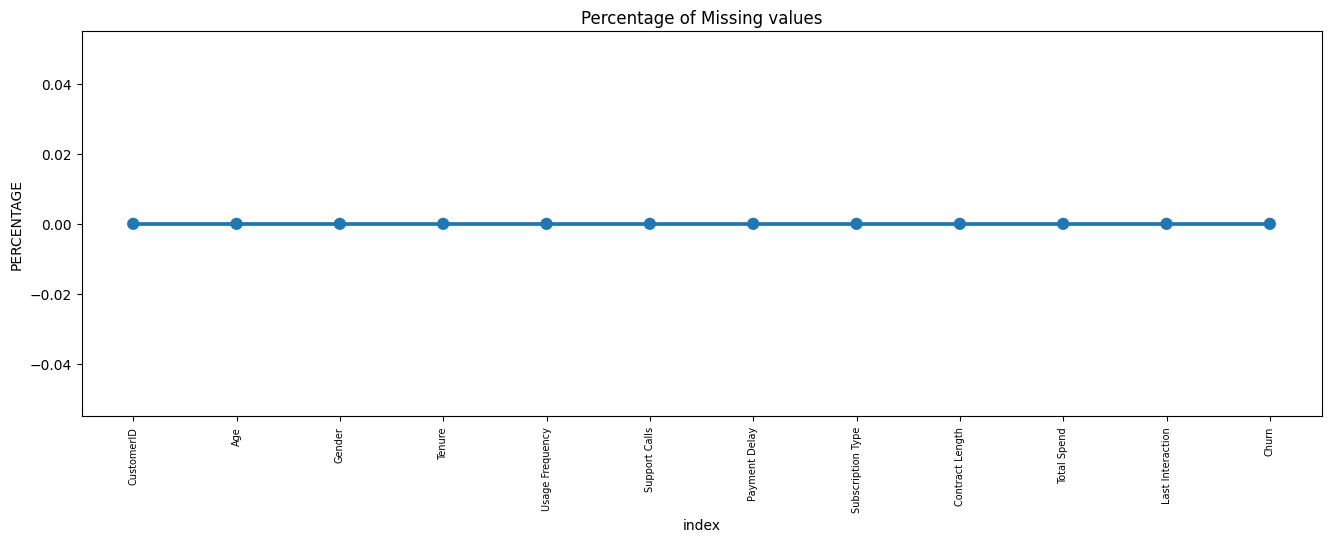

In [8]:
# Visual Representations of Checking Null Values
missing = pd.DataFrame((copy_df.isnull().sum())*100/copy_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(data = missing, x="index", y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<b>Here, we don't have any missing data</b>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Tenure'),
  Text(2, 0, 'Usage Frequency'),
  Text(3, 0, 'Support Calls'),
  Text(4, 0, 'Payment Delay'),
  Text(5, 0, 'Total Spend'),
  Text(6, 0, 'Last Interaction'),
  Text(7, 0, 'Churn')])

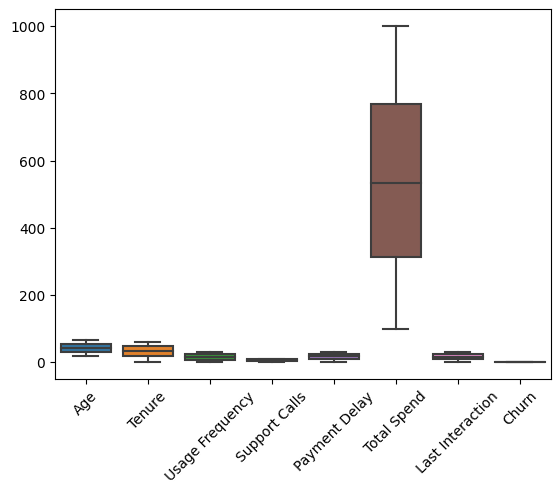

In [9]:
# Outlier Detection
outlier_df = copy_df.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
sns.boxplot(data=outlier_df)
plt.xticks(rotation=45)

<b>There are no outliers in any columns</b>

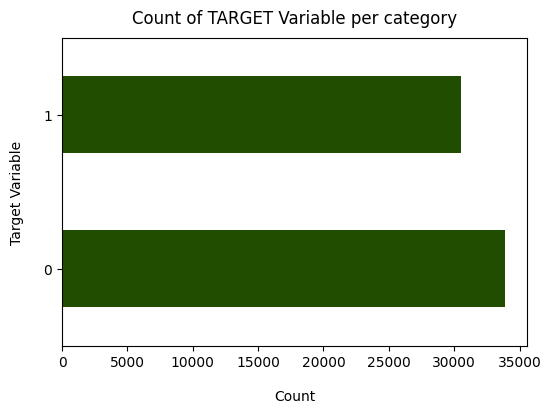

In [10]:
# Checking Balanced or Imbalanced Dataset
copy_df['Churn'].value_counts().plot(kind='barh', color="#204D00", figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [11]:
# Total number of Churned customers and not churned customers
copy_df['Churn'].value_counts()

Churn
0    33881
1    30493
Name: count, dtype: int64

In [12]:
# Percentage of Churned Customers and not Churned Customers
100*copy_df['Churn'].value_counts()/len(copy_df['Churn'])

Churn
0    52.631497
1    47.368503
Name: count, dtype: float64

<b> The total customers are <i>64374</i>. From here, <i>30493</i> are churned customers and <i>33881</i> are not. </b>
1. So, we can say that <b>47.36%</b> customers are churned and <b>52.63%</b> customers are not churned
2. The dataset is highly balanced and the ration is <b>53:47</b>

In [13]:
# Checking which feature/column should be converted into Bins
for column in copy_df.columns:
    print(f'{column} =>', copy_df[column].value_counts().shape)

CustomerID => (64374,)
Age => (48,)
Gender => (2,)
Tenure => (60,)
Usage Frequency => (30,)
Support Calls => (11,)
Payment Delay => (31,)
Subscription Type => (3,)
Contract Length => (3,)
Total Spend => (901,)
Last Interaction => (30,)
Churn => (2,)


The <b>CustomerID</b> column has the highest number of distinct values; however, it is not relevant for the analysis and will be dropped later. Additionally, the <b>Age</b> column contains 48 distinct values, which can be considered for binning, though this will be addressed at a later stage. The <b>Tenure</b> column contains 60 distinct values, which can make analysis and visualization challenging. To address this, we can group the data into 4-5 bins. Binning these values will simplify the analysis and enhance the clarity of data visualization

In [14]:
# Binning => Tenure
max_val = copy_df['Tenure'].max()
min_val = copy_df['Tenure'].min()
labels = ["{0} - {1}".format(i, i + 11) for i in range(min_val, max_val, 12)]
copy_df['tenure_group'] = pd.cut(copy_df.Tenure, range(min_val, max_val+10, 12), right=False, labels=labels)
copy_df['tenure_group'].value_counts()

tenure_group
49 - 60    13995
37 - 48    13968
25 - 36    13764
1 - 12     11360
13 - 24    11287
Name: count, dtype: int64

In [15]:
copy_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,25 - 36
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,25 - 36
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,25 - 36
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,1 - 12
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,49 - 60


In [16]:
# Dropping CustomerID & Tenure Columns
copy_df.drop(['CustomerID', 'Tenure'], axis=1, inplace=True)

In [17]:
copy_df.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group
0,22,Female,14,4,27,Basic,Monthly,598,9,1,25 - 36
1,41,Female,28,7,13,Standard,Monthly,584,20,0,25 - 36
2,47,Male,10,2,29,Premium,Annual,757,21,0,25 - 36
3,35,Male,12,5,17,Premium,Quarterly,232,18,0,1 - 12
4,53,Female,24,9,2,Standard,Annual,533,18,0,49 - 60


We have successfully completed the Data Cleaning and Preprocessing phase and will now proceed with the data analysis part.

### Statistical Analysis<a class="anchor" id="Statistical Analysis"></a>

In [18]:
# Overall statistical results
copy_df.describe()

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


#### Insights
1. The highest age is 65, the lowest is 18, and the average age is 42. Most people (75th percentile) are aged up to 54.
2. On average, there are 5.4 support calls.
3. The longest payment delay is 30 days.
4. Total spending ranges from 100 to 1000, with an average of 541.
5. Usage frequency varies from 1 to 30, with an average of 15.

### Univariate Analysis<a class="anchor" id="Univariate Analysis"></a>
<i>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.</i>

In [19]:
# set our charts' colors
color = ["#00876c", "#6b9c72", "#a3b088", "#cec6ad", "#cda376", "#d37755", "#d43d51"]

<Axes: xlabel='Age', ylabel='count'>

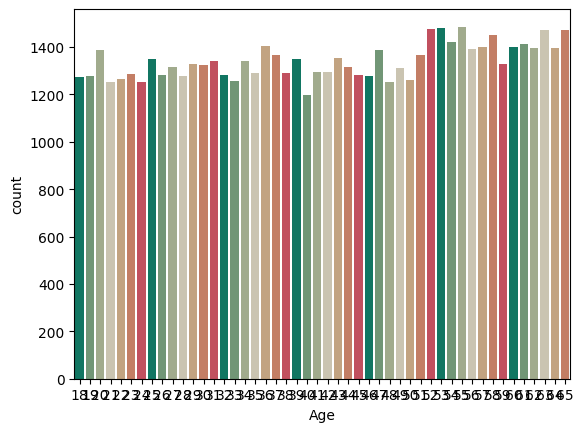

In [20]:
# Univariate Analysis of Age Column
sns.countplot(data=copy_df, x="Age", palette=color)

From this point, it is evident that the Age column values should be grouped into bins

In [21]:
# Binning => Age (This part is Data Processing Part)
max_val = copy_df['Age'].max()
min_val = copy_df['Age'].min()
labels = ["{0} - {1}".format(i, i + 11) for i in range(min_val, max_val, 12)]
copy_df['Age_group'] = pd.cut(copy_df.Age, range(min_val, max_val+10, 12), right=False, labels=labels)
copy_df['Age_group'].value_counts()

Age_group
54 - 65    17035
42 - 53    16054
30 - 41    15738
18 - 29    15547
Name: count, dtype: int64

In [22]:
copy_df.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group,Age_group
0,22,Female,14,4,27,Basic,Monthly,598,9,1,25 - 36,18 - 29
1,41,Female,28,7,13,Standard,Monthly,584,20,0,25 - 36,30 - 41
2,47,Male,10,2,29,Premium,Annual,757,21,0,25 - 36,42 - 53
3,35,Male,12,5,17,Premium,Quarterly,232,18,0,1 - 12,30 - 41
4,53,Female,24,9,2,Standard,Annual,533,18,0,49 - 60,42 - 53


In [23]:
# Dropping Age column
copy_df.drop("Age", axis=1, inplace=True)

In [24]:
copy_df.head()

,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group,Age_group
0,Female,14,4,27,Basic,Monthly,598,9,1,25 - 36,18 - 29
1,Female,28,7,13,Standard,Monthly,584,20,0,25 - 36,30 - 41
2,Male,10,2,29,Premium,Annual,757,21,0,25 - 36,42 - 53
3,Male,12,5,17,Premium,Quarterly,232,18,0,1 - 12,30 - 41
4,Female,24,9,2,Standard,Annual,533,18,0,49 - 60,42 - 53


<Axes: xlabel='Age_group', ylabel='count'>

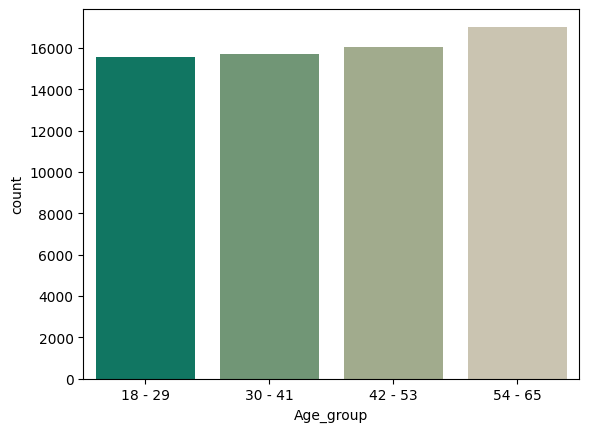

In [25]:
# Univariate Analysis of Age Column
sns.countplot(data=copy_df, x="Age_group", palette=color)

<b>In our dataset, the age ranges from 18 to 65, with a higher proportion of people aged between 54 and 65.</b>

In [26]:
# Function of donut chart
def create_donut(sizes, labels, ax):
    ax.pie(
        sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=color, 
        wedgeprops={'width': 0.4}  # Width controls the donut shape
    )

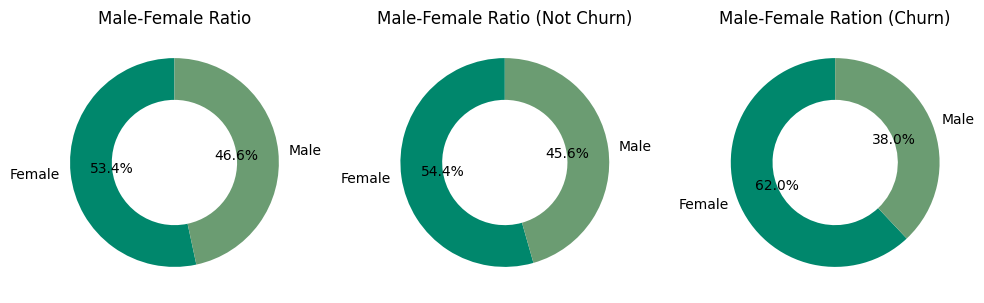

In [27]:
# Univariate Analysis of Gender 
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Gender"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Gender"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Gender"].value_counts(), copy_df["Gender"].unique(), axes[0])
create_donut(x["Gender"].value_counts(), x["Gender"].unique() , axes[1])
create_donut(y["Gender"].value_counts(), y["Gender"].unique(), axes[2])

# Set titles
axes[0].set_title('Male-Female Ratio')
axes[1].set_title('Male-Female Ratio (Not Churn)')
axes[2].set_title('Male-Female Ration (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

#### Insights
1. In our dataset <b>53.4%</b> are <b>Female</b> and <b>46.6%</b> are <b>Male</b>
2. <b>Female</b> are more likely to churn than <b>Male</b>.

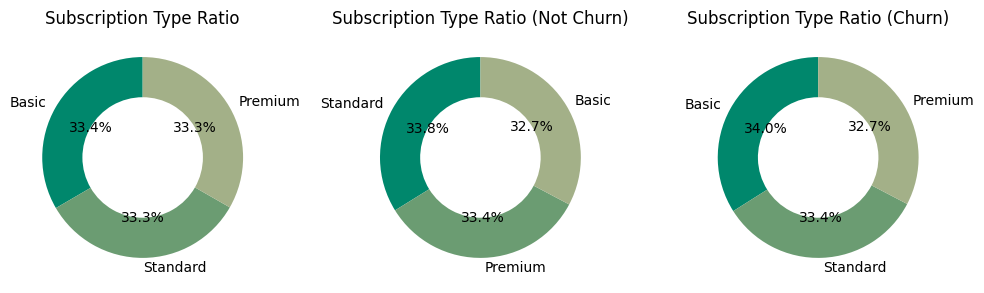

In [28]:
# Univariate Analysis of Subscription Type 
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Subscription Type"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Subscription Type"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Subscription Type"].value_counts(), copy_df["Subscription Type"].unique(), axes[0])
create_donut(x["Subscription Type"].value_counts(), x["Subscription Type"].unique() , axes[1])
create_donut(y["Subscription Type"].value_counts(), y["Subscription Type"].unique(), axes[2])

# Set titles
axes[0].set_title('Subscription Type Ratio')
axes[1].set_title('Subscription Type Ratio (Not Churn)')
axes[2].set_title('Subscription Type Ratio (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

<b>Subscription Type has no impact on customer churn.</b>

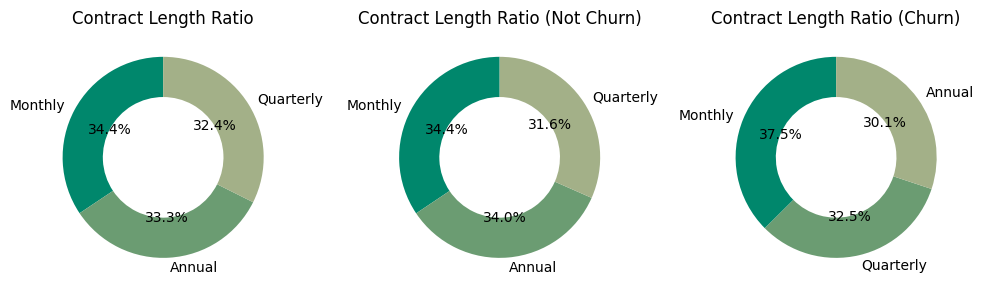

In [29]:
# Univariate Analysis of Contract Length 
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Contract Length"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Contract Length"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Contract Length"].value_counts(), copy_df["Contract Length"].unique(), axes[0])
create_donut(x["Contract Length"].value_counts(), x["Contract Length"].unique() , axes[1])
create_donut(y["Contract Length"].value_counts(), y["Contract Length"].unique(), axes[2])

# Set titles
axes[0].set_title('Contract Length Ratio')
axes[1].set_title('Contract Length Ratio (Not Churn)')
axes[2].set_title('Contract Length Ratio (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

<b>In our dataset 3 types of contract length's data are nearly equally distributed, from this Monthly Contract has high churn rate.</b>

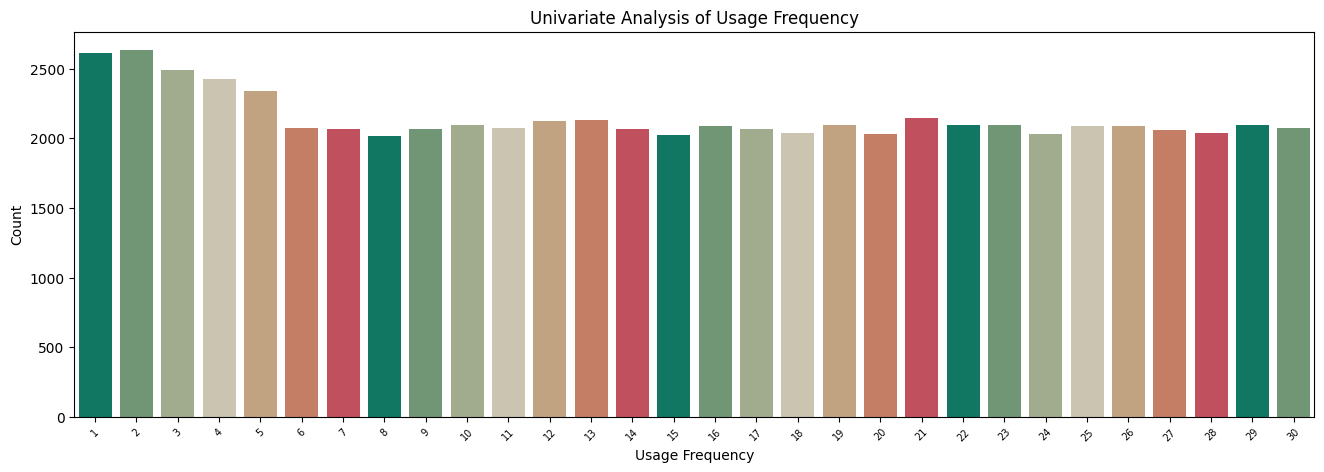

In [30]:
# Univariate Analysis of Usage Frequency
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Usage Frequency", palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Univariate Analysis of Usage Frequency")
plt.ylabel("Count")
plt.show()

<b>Most of the people's usage frequency lies in the range 1 to 5</b>

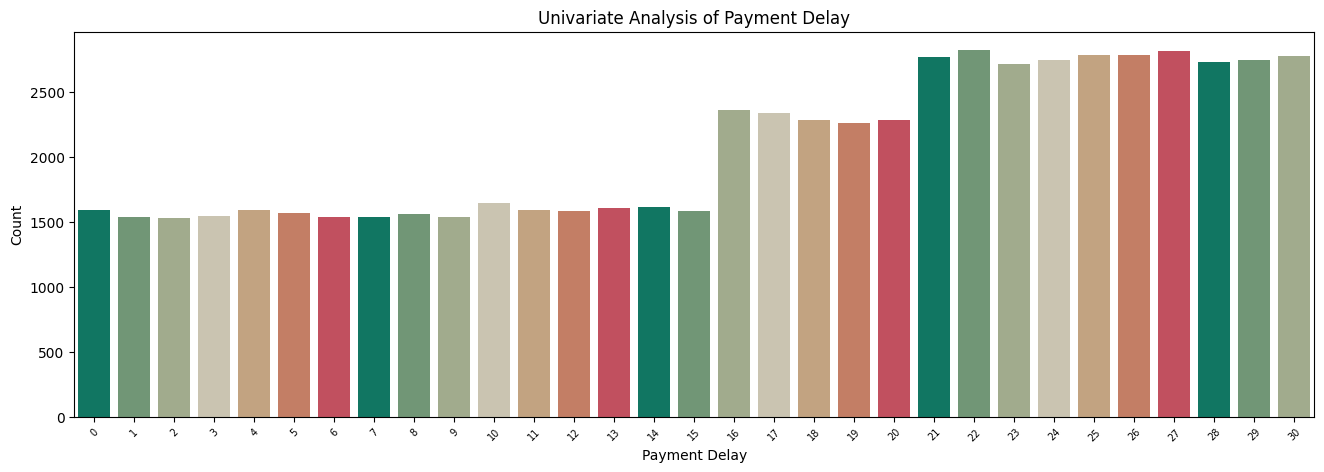

In [31]:
# Univariate Analysis of Payment Delay
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Payment Delay", palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Univariate Analysis of Payment Delay")
plt.ylabel("Count")
plt.show()

<b>Maximum people's payment delay lies in the range 16 to 30 days.</b>

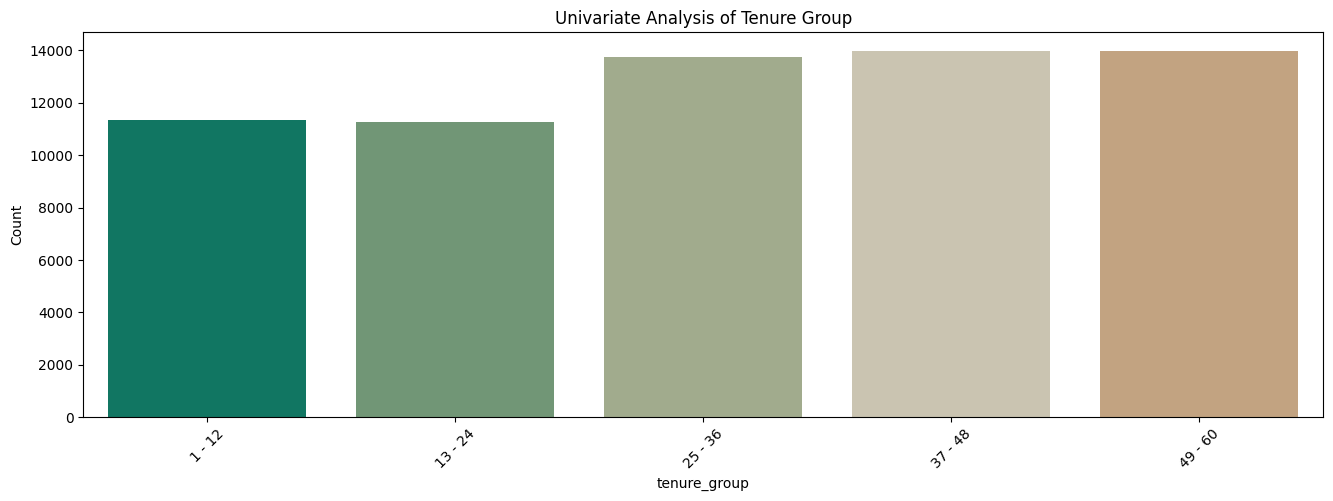

In [32]:
# Univariate Analysis of Tenure 
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="tenure_group", palette=color)
plt.xticks(rotation =45)
plt.title("Univariate Analysis of Tenure Group")
plt.ylabel("Count")
plt.show()

The tenure groups <b>25-36</b>, <b>37-48</b>, and <b>49-60</b> have the highest customer counts, indicating longer customer retention.

###  Bivariate Analysis<a class="anchor" id="Bivariate Analysis"></a>
Bivariate analysis explores the relationship between two variables to identify insights

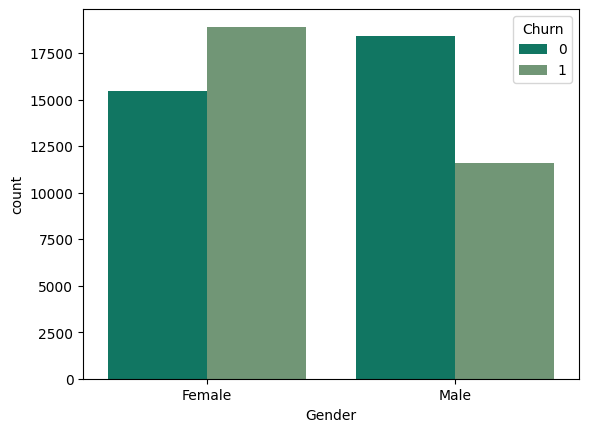

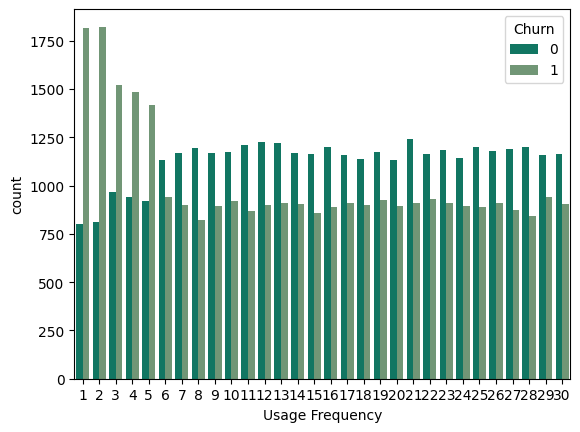

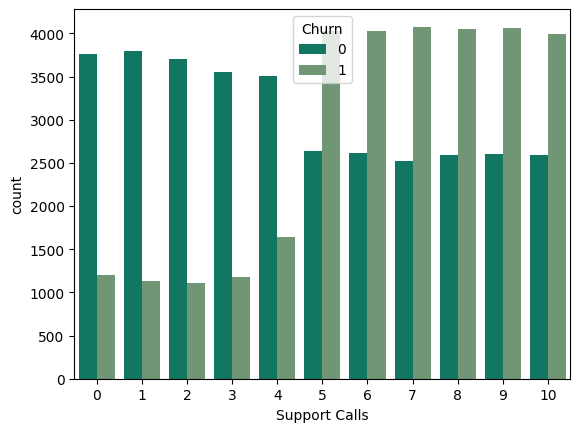

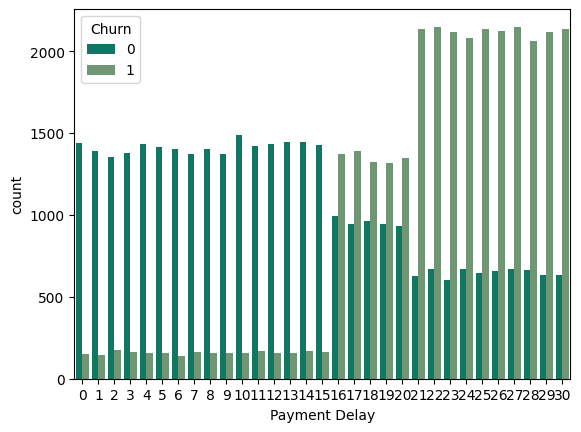

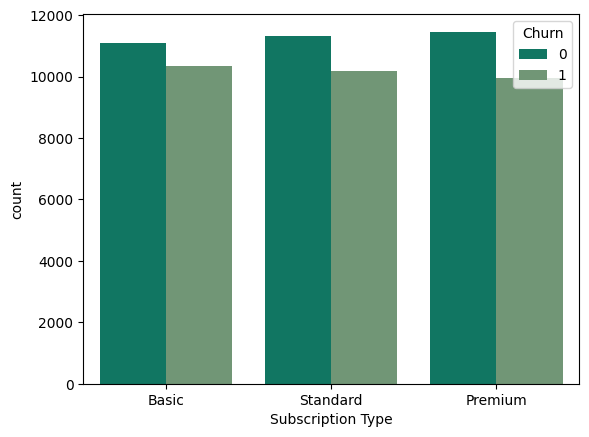

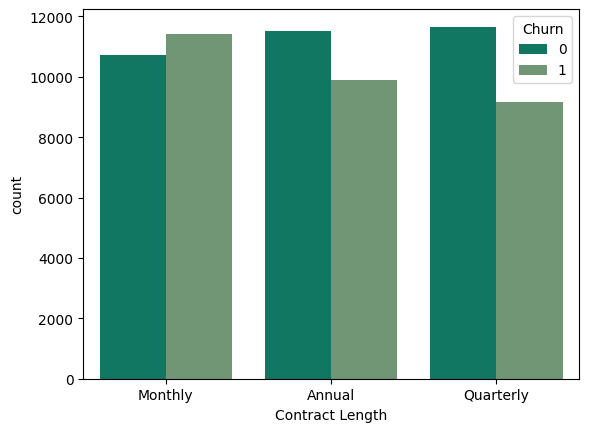

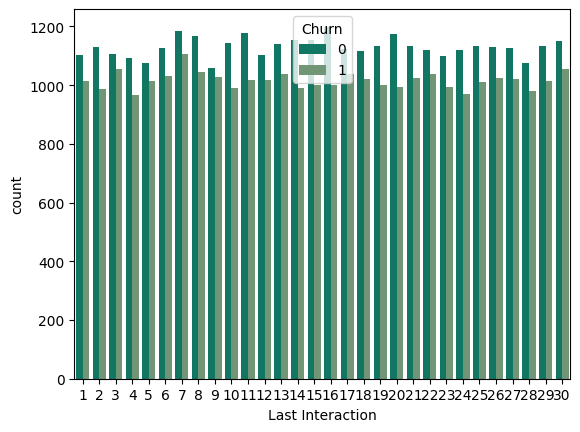

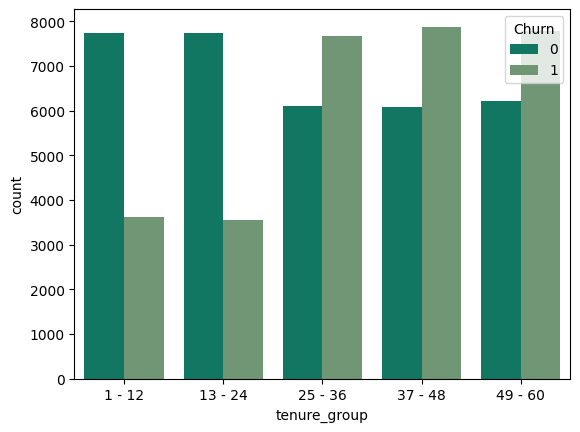

In [33]:
color = ["#00876c", "#6b9c72", "#a3b088", "#cec6ad", "#cda376", "#d37755", "#d43d51"]
for i, predictor in enumerate(copy_df.drop(columns=['Churn', 'Total Spend', 'Age_group'])):
    plt.figure(i)
    sns.countplot(data=copy_df, x=predictor, hue='Churn', palette=color)

From above charts we can see that we should re-plot <b>Usage Frequency</b>, <b>Payment Delay</b>, and <b>Last Interaction</b> for better analysis.

<b>Insights</b> 
1. <b>Female</b> are more likely to churn than <b>Male</b>.
2. <b>Female</b> churn rate is approximately <b>54%</b> where <b>Male</b> churn rate is approximately <b>37%</b>.
3. Where <b>support calls</b> are <b>less than 5</b>, we found the churn rate is <b>low</b>.
4. Where <b>support calls</b> are <b>greater than or equal to 5</b>, we found the churn rate is <b>high</b>.
5. <b>Subscription Type</b> has <b>no impact</b> on customer churn.
6. <b>Monthly Contract length</b> has <b>high</b> churn than others.
7. <b>Low</b> churn is seen in <b>Tenure range (1-24)</b>.

Text(0.5, 1.0, 'Support Calls by churn')

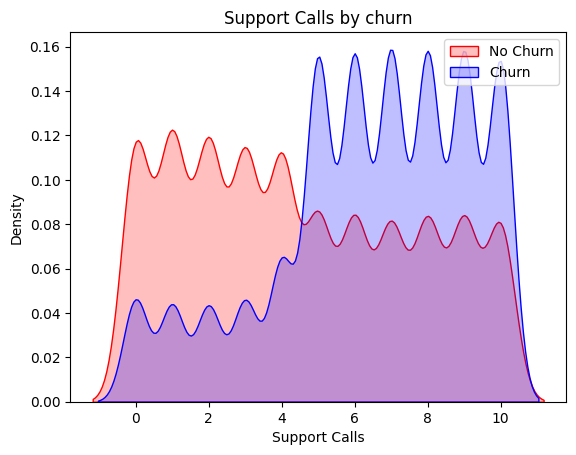

In [34]:
# Kde Plot of Support Calls (Doing again Bivariate Analysis for better understanding using KDE)
Tot = sns.kdeplot(copy_df["Support Calls"][(copy_df["Churn"] == 0)],
                color="Red", shade = True)
Tot = sns.kdeplot(copy_df["Support Calls"][(copy_df["Churn"] == 1)],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Support Calls')
Tot.set_title('Support Calls by churn')

<b>From here we can also see that, low churn lies in between 1 to 4 calls and above 5 calls it shows high churn.</b>

Text(0.5, 1.0, 'Total Spend by churn')

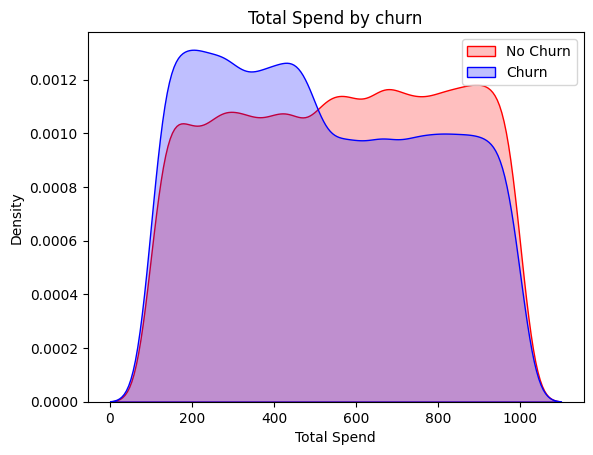

In [35]:
# Bivariate Analysis of Total Spend by using KDE 
Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 0)],
                color="Red", shade = True)
Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 1)],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Spend')
Tot.set_title('Total Spend by churn')

<b>People who spend high amount they have a low tendency to churn.</b>

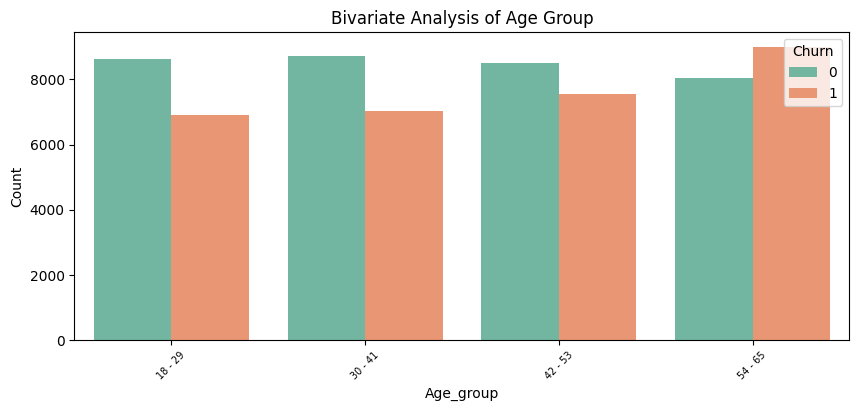

In [36]:
# Bivariate Analysis of Age group
plt.figure(figsize=(10,4))
ax = sns.countplot(data=copy_df, x="Age_group", hue='Churn', palette = "Set2")
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Age Group")
plt.ylabel("Count")
plt.show()

People who are <b>above 53</b> are more likely to churn than <b>younger</b>

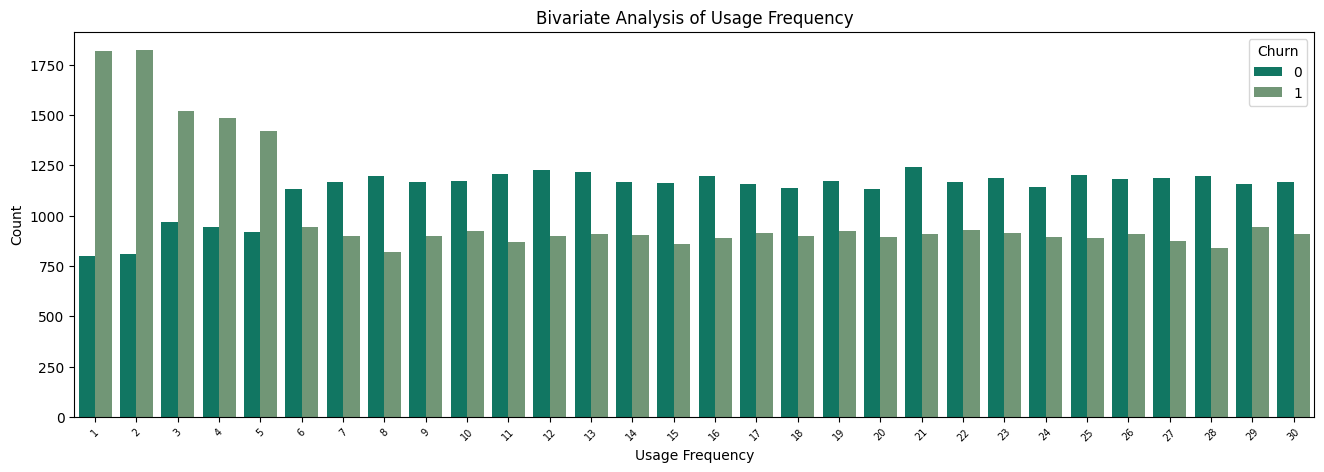

In [37]:
# Bivariate Analysis of Usage Frequency
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Usage Frequency", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Usage Frequency")
plt.ylabel("Count")
plt.show()

<b>Those people who use the service very less amount of time (<=5) have a greater tendency to churn than who use the service much.</b>

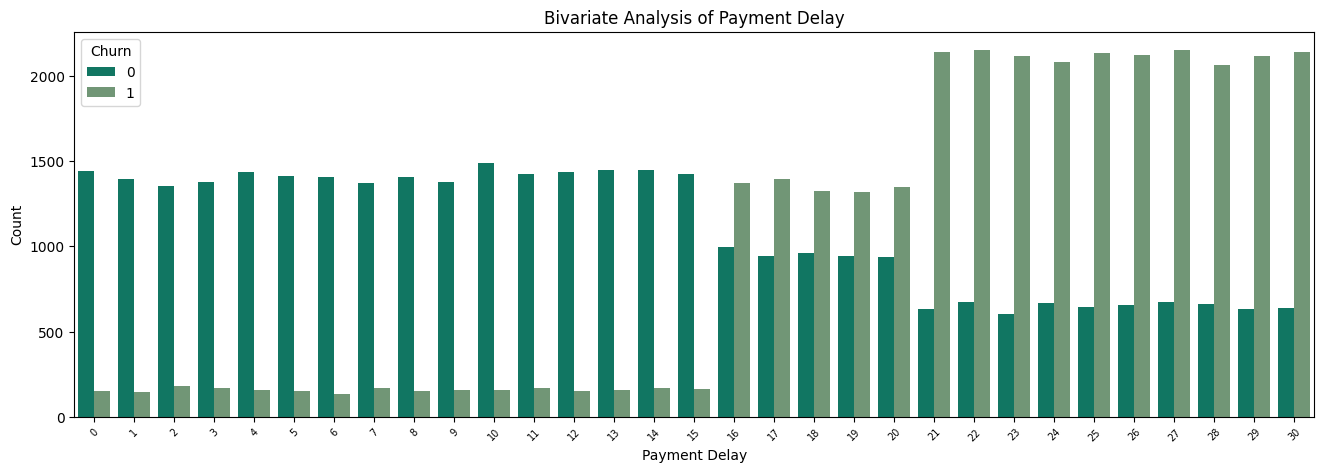

In [38]:
# Biivariate Analysis of Payment Delay
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Payment Delay", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Payment Delay")
plt.ylabel("Count")
plt.show()

<b>Those who has high payment delay (more than 15 days) are more likely to churn than less payment delay.</b>

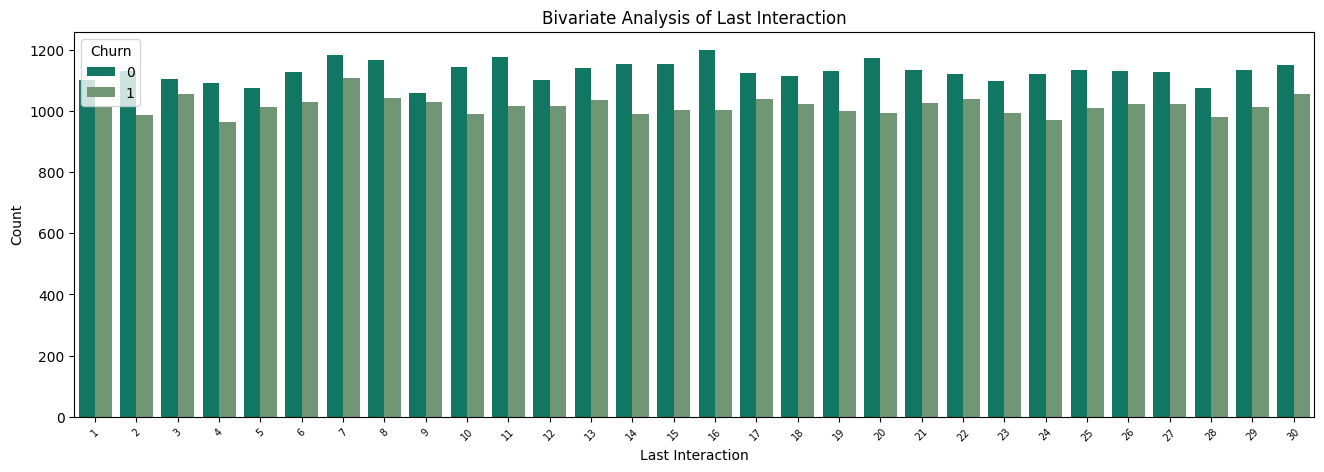

In [39]:
# Biivariate Analysis of Last Interaction
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Last Interaction", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Last Interaction")
plt.ylabel("Count")
plt.show()

<b>People's last interaction has no significant impact on customer churn.</b>

In [40]:
new_df1_target0=copy_df.loc[copy_df["Churn"]==0]
new_df1_target1=copy_df.loc[copy_df["Churn"]==1]

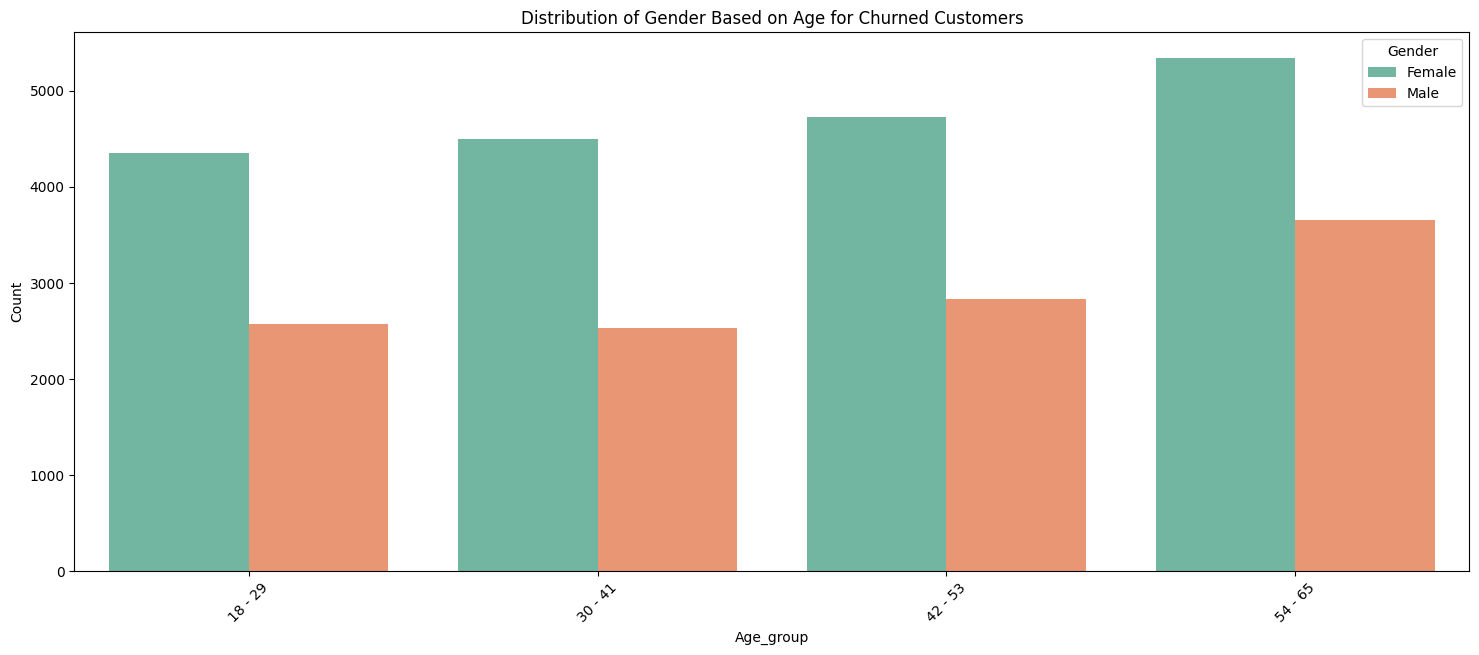

In [41]:
plt.figure(figsize=(18,7))
ax = sns.countplot(data=new_df1_target1, x="Age_group", hue='Gender', palette="Set2")
plt.xticks(rotation =45)
plt.title("Distribution of Gender Based on Age for Churned Customers")
plt.ylabel("Count")
plt.show()

<b>Most of the female who have a high tendency to churn out are above 50 ages.</b>

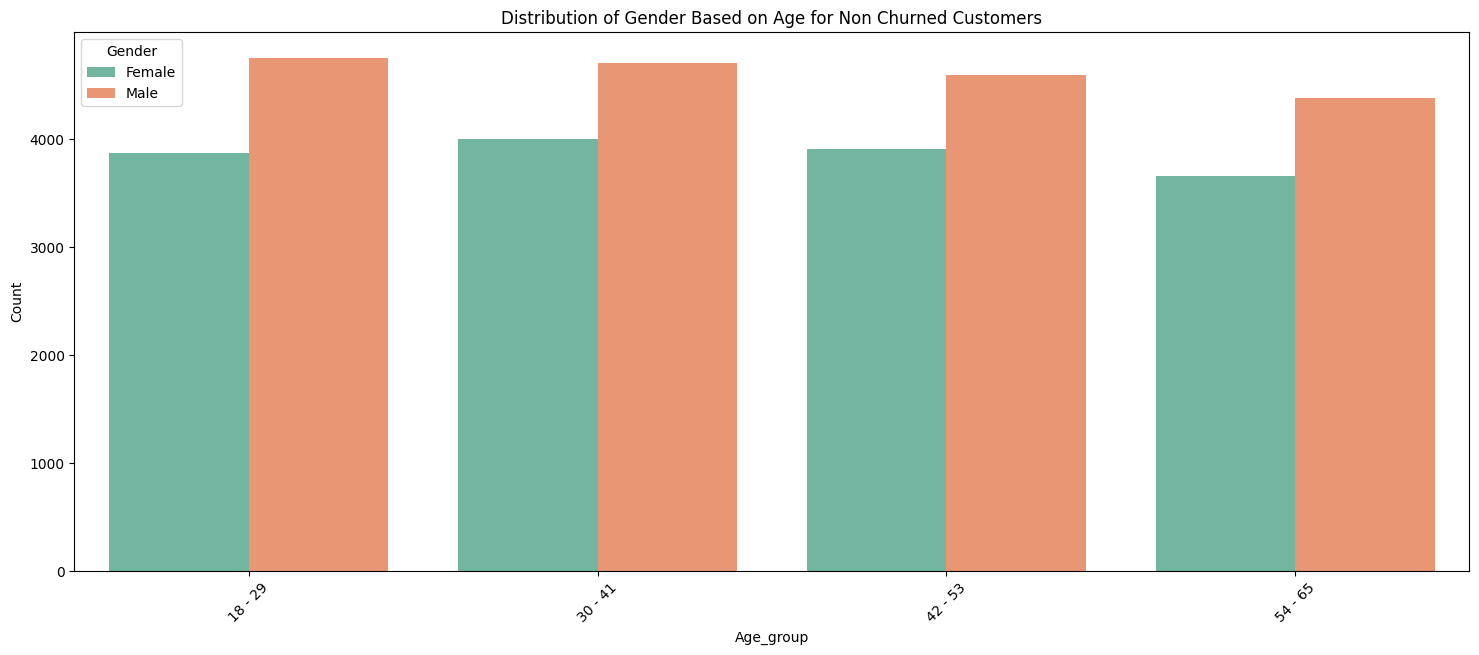

In [42]:
plt.figure(figsize=(18,7))
ax = sns.countplot(data=new_df1_target0, x="Age_group", hue='Gender', palette="Set2")
plt.xticks(rotation =45)
plt.title("Distribution of Gender Based on Age for Non Churned Customers")
plt.ylabel("Count")
plt.show()

<b>Younger male have a low tendency to churn out.</b>

### Feature Encoding<a class="anchor" id="Feature Encoding"></a>

In [43]:
# Convert all the categorical variables into dummy variables
copy_df_dummies = pd.get_dummies(copy_df)
copy_df_dummies.head()

,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,...,Contract Length_Quarterly,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,Age_group_18 - 29,Age_group_30 - 41,Age_group_42 - 53,Age_group_54 - 65
0,14,4,27,598,9,1,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,28,7,13,584,20,0,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,10,2,29,757,21,0,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
3,12,5,17,232,18,0,False,True,False,True,...,True,True,False,False,False,False,False,True,False,False
4,24,9,2,533,18,0,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False


<Axes: >

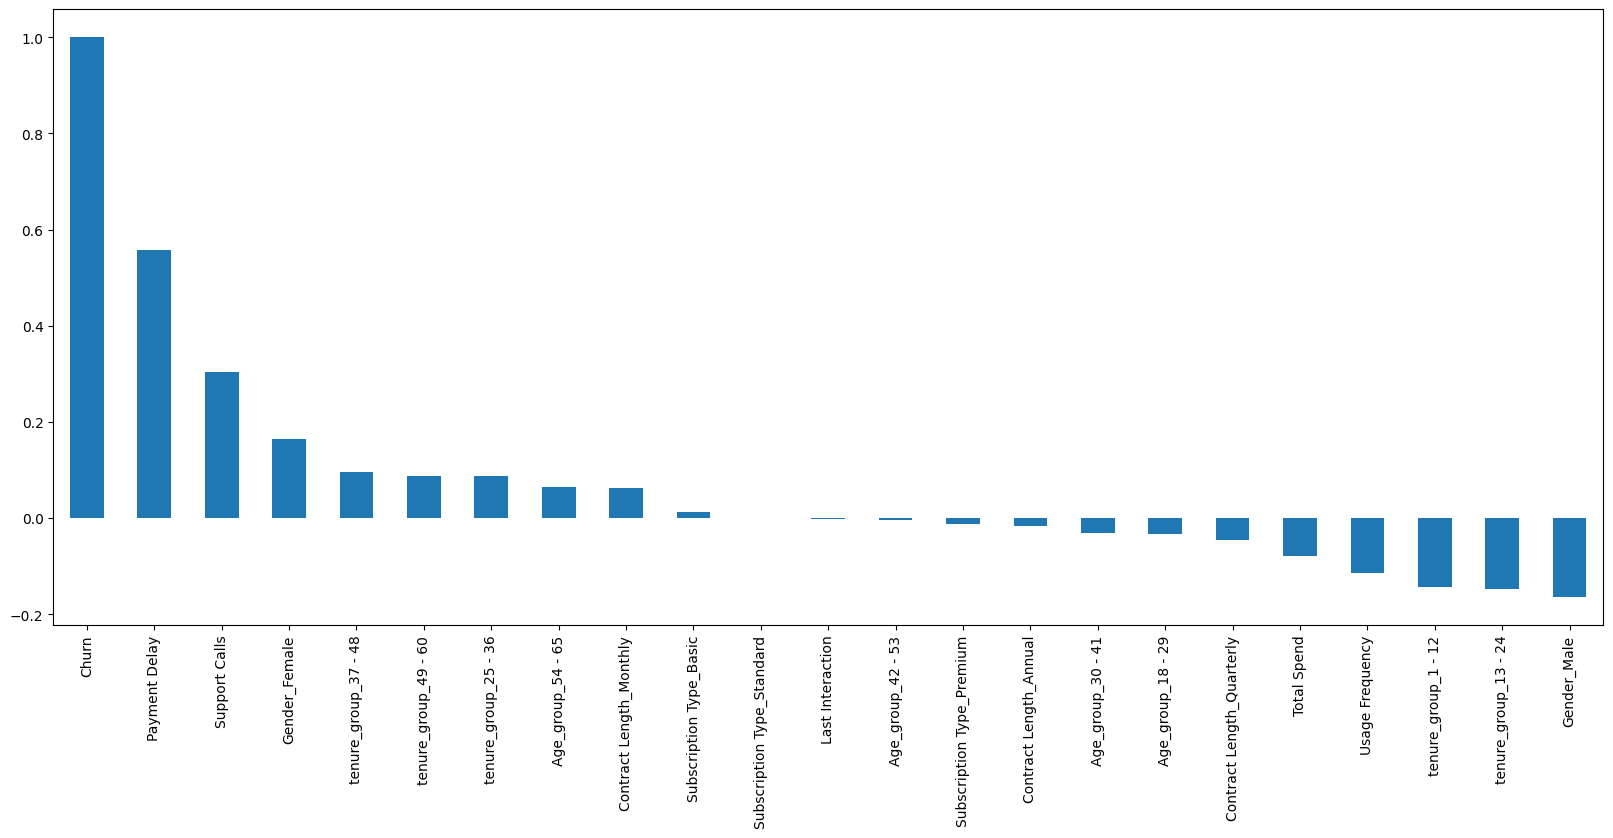

In [44]:
# Build a corelation of all predictors with 'Churn'
plt.figure(figsize=(20,8))
copy_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

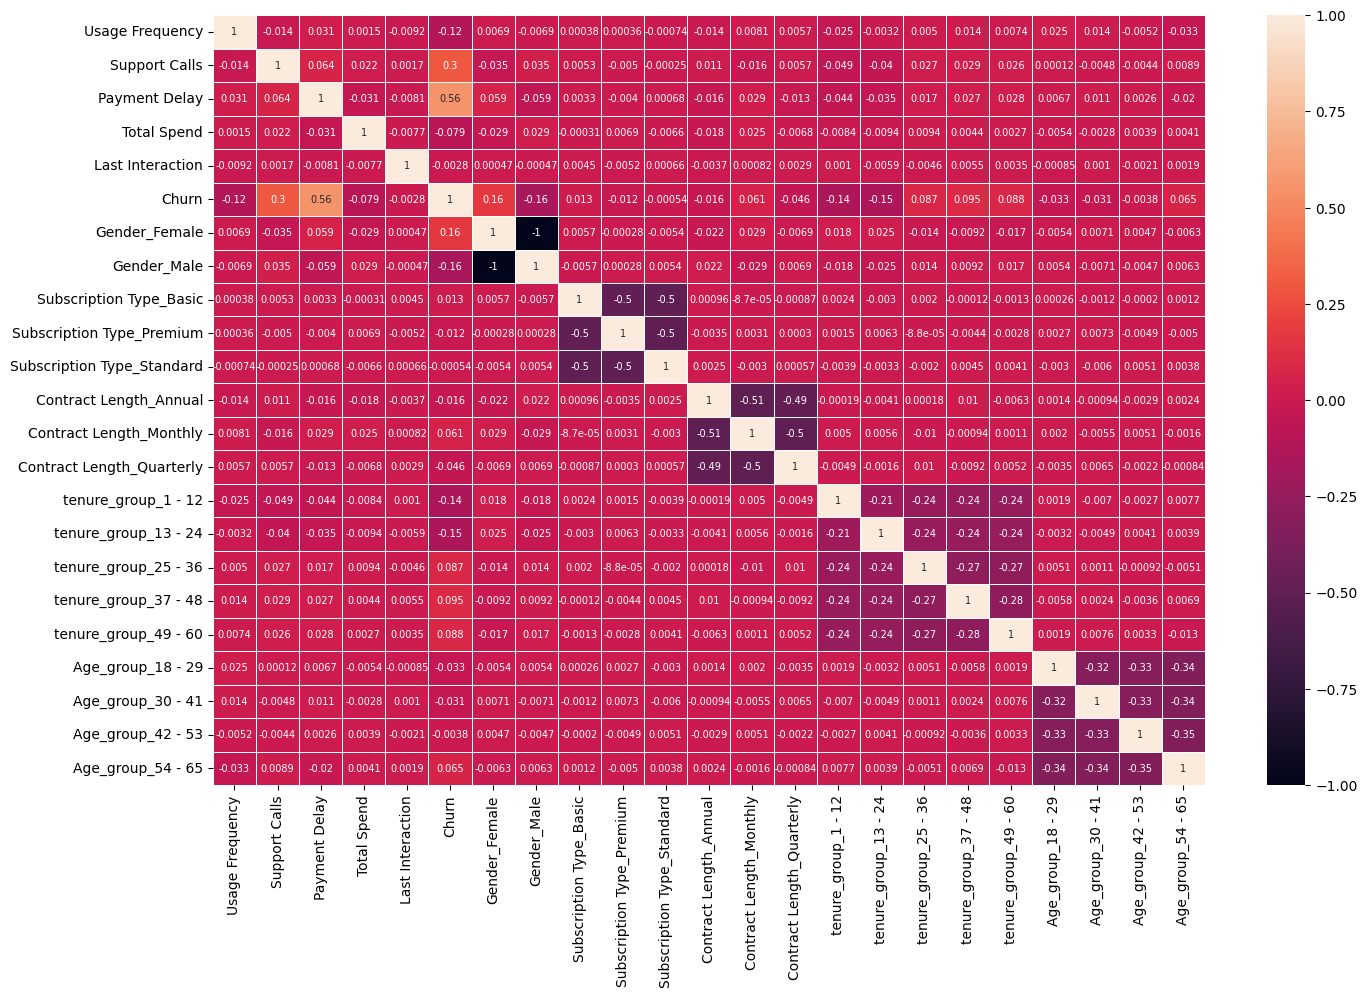

In [45]:
# Visual Representation of corelation using heatmap
plt.figure(figsize=(16,10))
sns.heatmap(copy_df_dummies.corr(), annot=True, annot_kws={"size": 7}, linewidths=.5)
plt.show()

<b>Insights</b><br>
<i>So the important factors which has a high corelation with Churn =></i>
1. payment delay
2. support calls
3. Female Gender

## <center>Overall Insights<a class="anchor" id="Overall Insights"></a></center>

#### Dataset Quality:<a class="anchor" id="Dataset Quality"></a>
- No missing data or outliers were found in the dataset.
- The dataset is balanced, with 47.36% churned customers and 52.63% retained customers (ratio 53:47).

#### Demographic Insights:<a class="anchor" id="Demographic Insights"></a>
- Age ranges from 18 to 65, with an average of 42. Most customers are aged up to 54 (75th percentile).
- A higher proportion of older customers (aged 54 and above) are more likely to churn.
- Female customers make up 53.4% of the dataset and are more likely to churn (churn rate ~54%) compared to males (~37%).
- Younger males have a lower tendency to churn, while older females (above 50) have a higher tendency.

#### Behavioral Patterns:<a class="anchor" id="Behavioral Patterns:"></a>
- Average usage frequency is 15, with most usage lying between 1 to 5. Customers with low usage (≤5) have a higher tendency to churn.
- Customers with high spending amounts are less likely to churn, while those with lower spending have higher churn rates.
- Payment delays exceeding 15 days significantly increase the likelihood of churn.

#### Support Interactions:<a class="anchor" id="Support Interactions:"></a>
- On average, customers make 5.4 support calls.
- Fewer support calls (<5) correlate with low churn, while higher calls (≥5) are linked to higher churn rates.

#### Subscription and Tenure Insights:<a class="anchor" id="Subscription and Tenure Insights"></a>
- Subscription type does not influence churn.
- Monthly contracts exhibit a higher churn rate compared to quarterly and annual contracts.
- Tenure groups of 25-36, 37-48, and 49-60 months indicate strong customer retention, while shorter tenure groups (1-24 months) experience higher churn.

#### Key Factors Influencing Churn:<a class="anchor" id="Key Factors Influencing Churn"></a>
- The key factors strongly correlated with churn are payment delay, support calls, and being of the female gender.
- Other factors, such as the last interaction date, show no significant impact on churn.

### Summary of Key Trends with Recommendations<a class="anchor" id="Summary of Key Trends with Recommendations"></a>

- Customers with high payment delays, high support calls, and low usage are at greater risk of churn.
- Targeting retention efforts toward older customers, particularly females, and addressing their concerns can help reduce churn.
- Offering incentives for longer contract lengths and improving customer support can also positively impact retention.

<img src="https://i.imgur.com/DIHkOY6.jpeg" alt="Thank You" style="width:100%;">